In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
matches_df = pd.read_csv("WorldCupMatches.csv")
players_df = pd.read_csv("WorldCupPlayers.csv")
cups_df = pd.read_csv("WorldCups.csv")
players_df.tail(3)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN
37783,255959,300186501,ARG,SABELLA Alejandro (ARG),N,23,BASANTA,NaN,NaN


In [48]:
cups_df.head(4)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246


In [50]:
matches_df.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


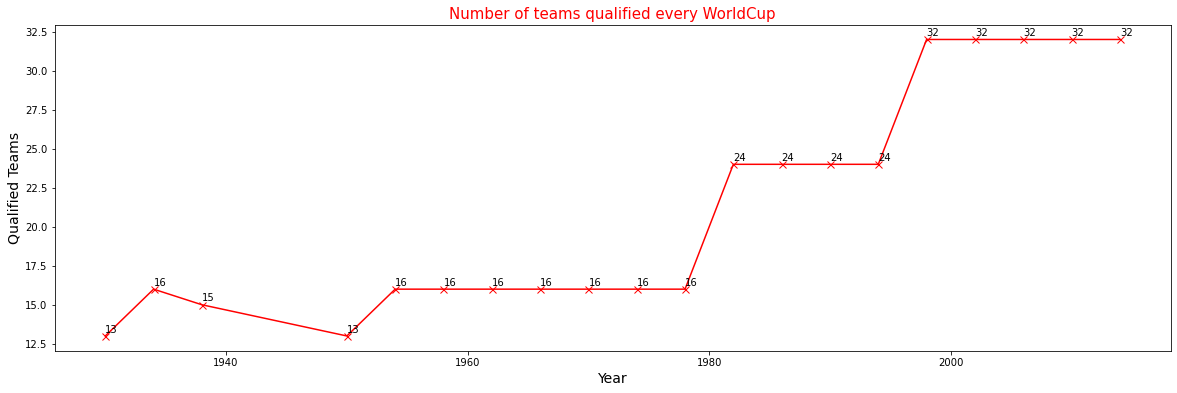

In [47]:
plt.figure(figsize=(20,6))
plt.plot(cups_df["Year"], cups_df["QualifiedTeams"],color='red', marker='x', markerfacecolor='blue', markersize=7)
plt.title('Number of teams qualified every WorldCup', fontsize=15, color='r')
#plt.figure(figsize=(15,15))
j=0
for i in cups_df['QualifiedTeams']:
    plt.annotate(i,(cups_df['Year'][j],cups_df['QualifiedTeams'][j]+0.25))
    j=j+1
plt.xlabel("Year", size = 14)
plt.ylabel("Qualified Teams", size = 14)
plt.show()

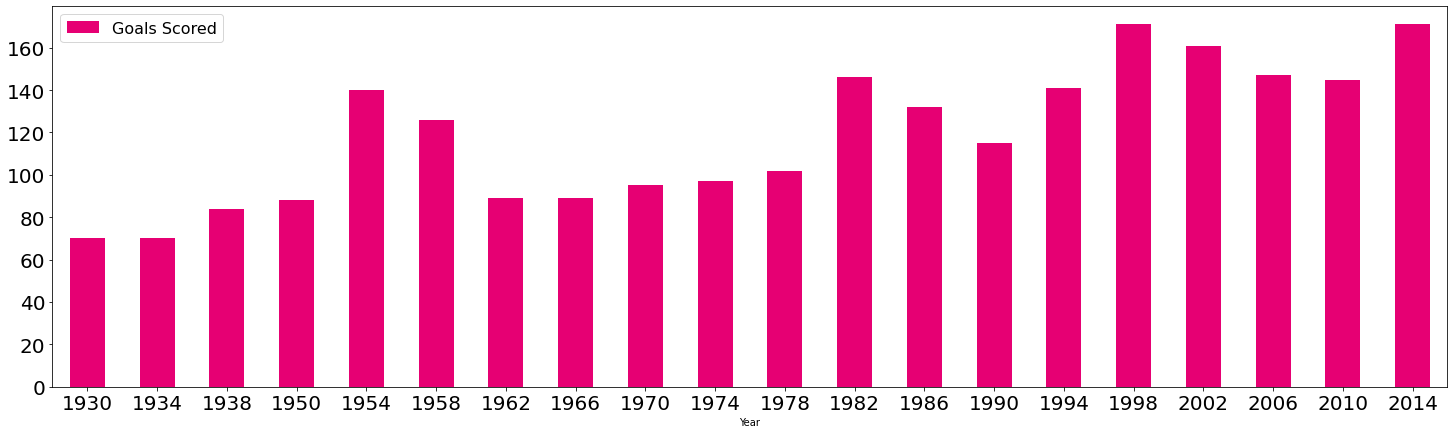

In [123]:
#plt.figure(figsize=(20,6))
bar_df = pd.DataFrame({'Year':cups_df['Year'], 'Goals Scored':cups_df['GoalsScored']})
ax = bar_df.plot.bar(x='Year', y='Goals Scored', rot=0, color='#e60073',figsize=(25,7), fontsize=20)
ax.legend(fontsize=16)

           Country  gold  silver  bronze
0          Uruguay     2       0       0
1            Italy     4       2       1
2       Germany FR     3       3       1
3           Brazil     5       2       2
4          England     1       0       0
5        Argentina     2       3       0
6           France     1       1       2
7            Spain     1       0       0
8          Germany     1       1       3
9   Czechoslovakia     0       2       0
10         Hungary     0       2       0
11          Sweden     0       1       2
12     Netherlands     0       3       1
13             USA     0       0       1
14         Austria     0       0       1
15           Chile     0       0       1
16        Portugal     0       0       1
17          Poland     0       0       2
18         Croatia     0       0       1
19          Turkey     0       0       1


Text(0.5, 1.0, 'Medals By Each Country')

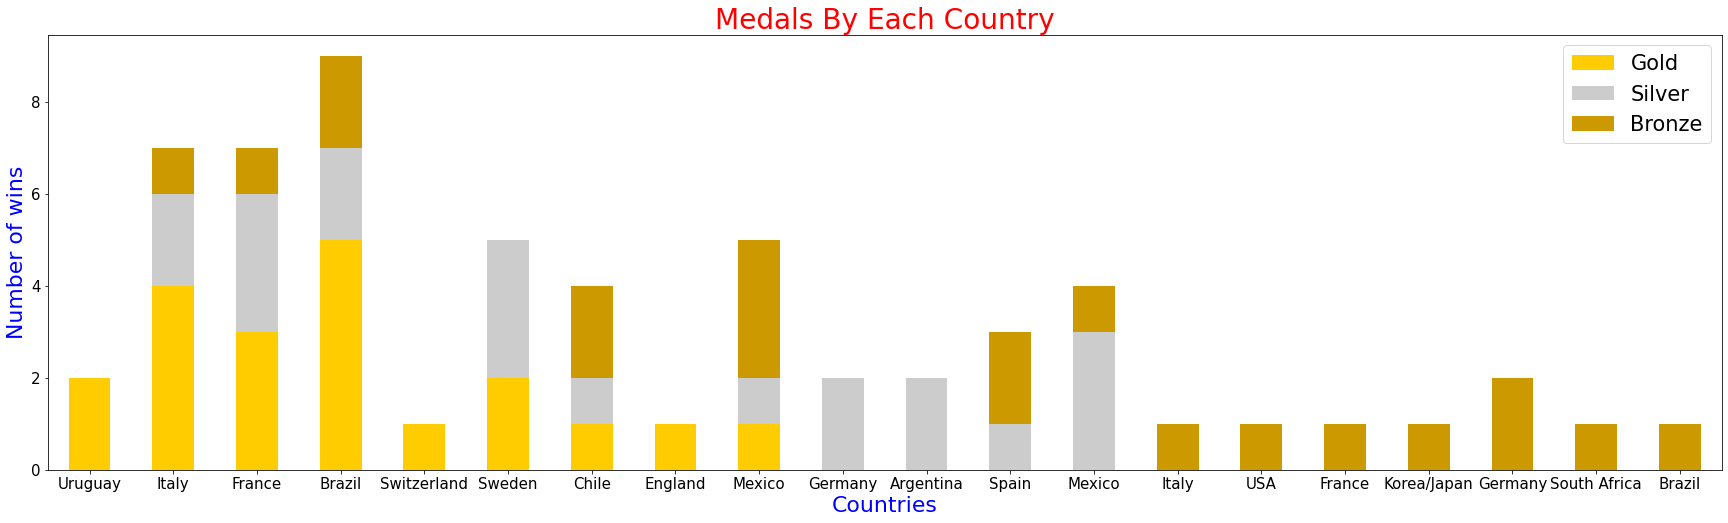

In [171]:
winner = cups_df["Winner"]
runnerUp = cups_df["Runners-Up"]
third = cups_df["Third"]
index = cups_df["Country"]

country_list = pd.concat([winner,runnerUp,third]).unique()
medals = {'Country':list(country_list),
        'gold':[],
        'silver':[],
        'bronze':[]}
for j in country_list:
    gold = 0
    silver = 0
    bronze = 0
    for i in winner:
        if(i==j):
            gold+=1
    for i in runnerUp:
        if(i==j):
            silver+=1
    for i in third:
        if(i==j):
            bronze+=1
    medals['gold'].append(gold)
    medals['silver'].append(silver)
    medals['bronze'].append(bronze)
country_list = pd.DataFrame(medals)
print(country_list)

df = pd.DataFrame({'Gold': medals['gold'],
                   'Silver': medals['silver'],
                   'Bronze': medals['bronze']}, index=index)
ax = df.plot.bar(rot=0,figsize=(30,8), color=('#ffcc00','#cccccc','#cc9900'), stacked=True, fontsize=15)
ax.legend(fontsize=21)
ax.set_xlabel("Countries",fontsize=22, color='b')
ax.set_ylabel("Number of wins",fontsize=22, color='b')
ax.set_title("Medals By Each Country", fontsize=28, color='r')

In [40]:
# year = cups_df['Year']
# attendance = cups_df['Attendance']
# countries = cups_df["Country"]
# a=pd.concat([year, attendance, countries]).unique()
# #print(a)
# data = {'attendance':list(attendance),
#         'Year':list(year),
#         'Country':list(countries)}
# attendance_list = pd.DataFrame(data)
# print(attendance_list)
# sns.relplot(x="Country", y="attendance", hue="year", data=a)
# b=sns.PairGrid(attendance_list)
# b.map(plt.scatter)

    Year       Country Attendance  GoalsScored
0   1930       Uruguay    590.549           70
1   1934         Italy    363.000           70
2   1938        France    375.700           84
3   1950        Brazil  1.045.246           88
4   1954   Switzerland    768.607          140
5   1958        Sweden    819.810          126
6   1962         Chile    893.172           89
7   1966       England  1.563.135           89
8   1970        Mexico  1.603.975           95
9   1974       Germany  1.865.753           97
10  1978     Argentina  1.545.791          102
11  1982         Spain  2.109.723          146
12  1986        Mexico  2.394.031          132
13  1990         Italy  2.516.215          115
14  1994           USA  3.587.538          141
15  1998        France  2.785.100          171
16  2002   Korea/Japan  2.705.197          161
17  2006       Germany  3.359.439          147
18  2010  South Africa  3.178.856          145
19  2014        Brazil  3.386.810          171


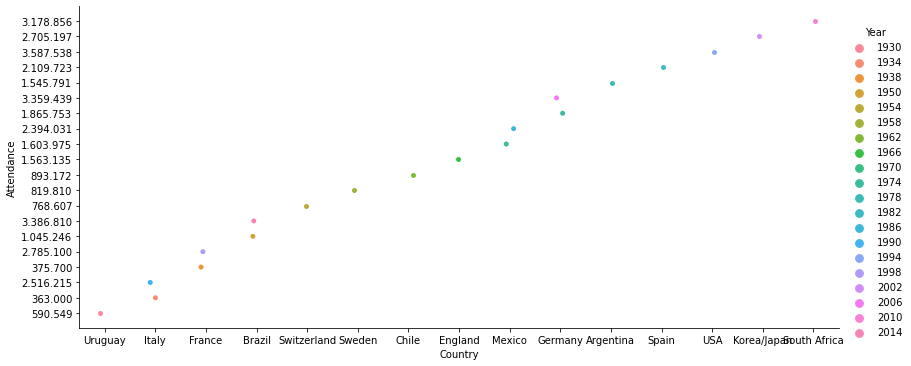

<Figure size 1440x504 with 0 Axes>

In [54]:
attendance_df = cups_df[['Year','Country','Attendance','GoalsScored']]
print(attendance_df)
sns.catplot(x="Country", y="Attendance", hue='Year', data=attendance_df, height=5, aspect=11.7/5)#
plt.figure(figsize=(20, 7))
plt.show()

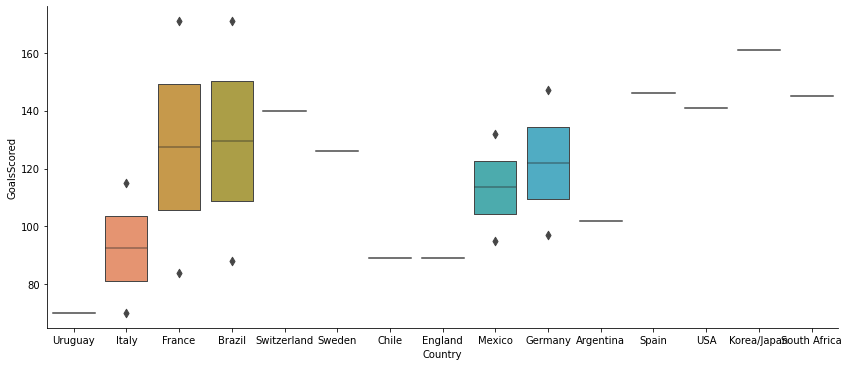

In [133]:
sns.catplot(x="Country", y="GoalsScored", kind="boxen", data=attendance_df, height=5, aspect=11.7/5)

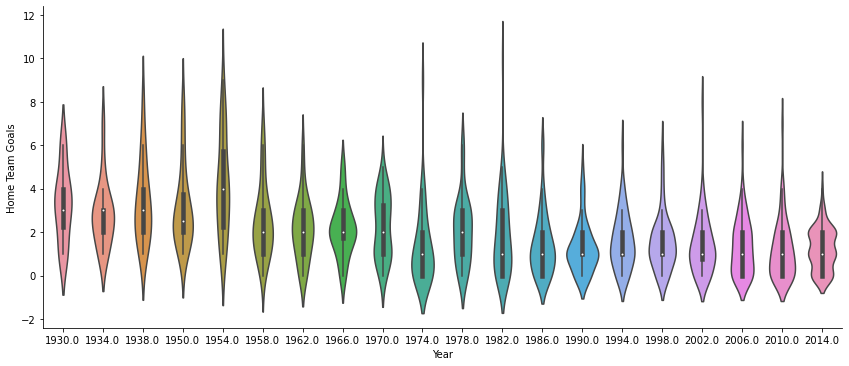

In [94]:
homegoals_df = matches_df[['Year','Stadium','City','Home Team Goals','Half-time Away Goals','Away Team Name']]
#print(stad_df)
homegoals_df["Home Team Goals"].unique()
sns.catplot(x="Year", y="Home Team Goals", kind="violin", data=homegoals_df, height=5, aspect=11.7/5)

In [112]:
# homegoals_df["Half-time Away Goals"].unique()
# f = sns.FacetGrid(homegoals_df, col="Half-time Away Goals")
# f.map(plt.hist, "Year")

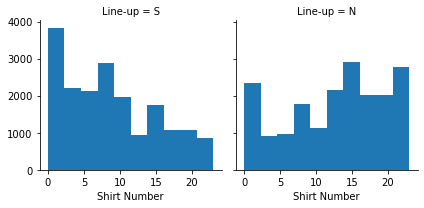

In [111]:
pos_df = players_df[['Line-up','Team Initials','Position','Shirt Number']]
pos_df["Line-up"].unique()
g = sns.FacetGrid(pos_df, col="Line-up")
g.map(plt.hist, "Shirt Number")

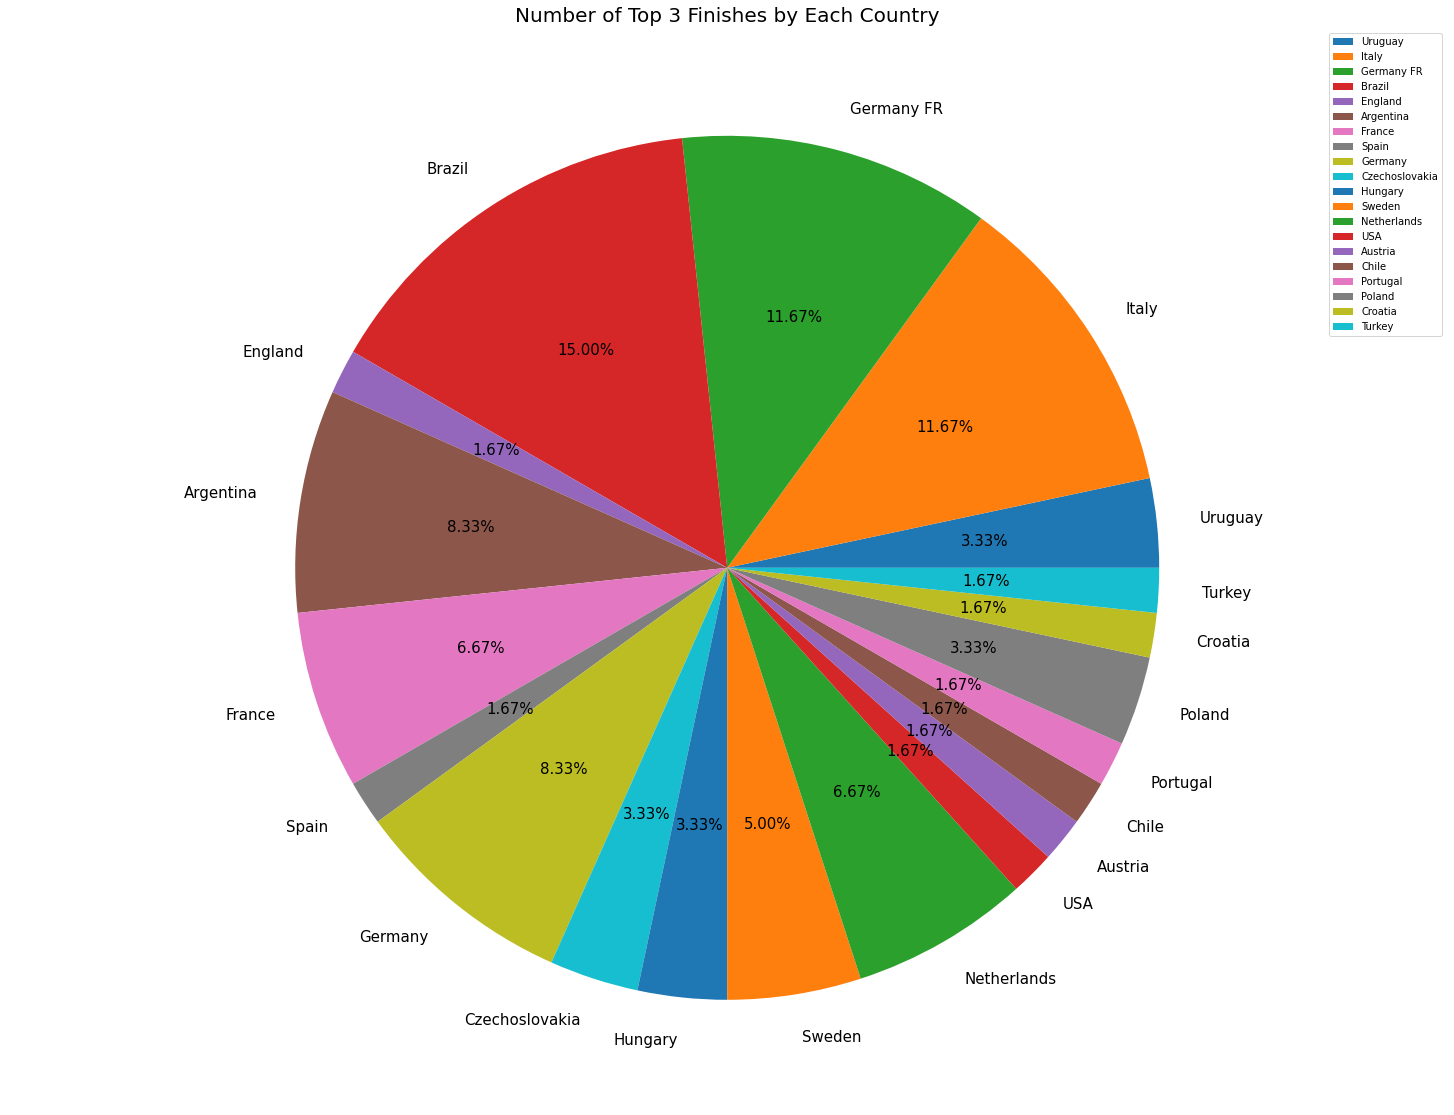

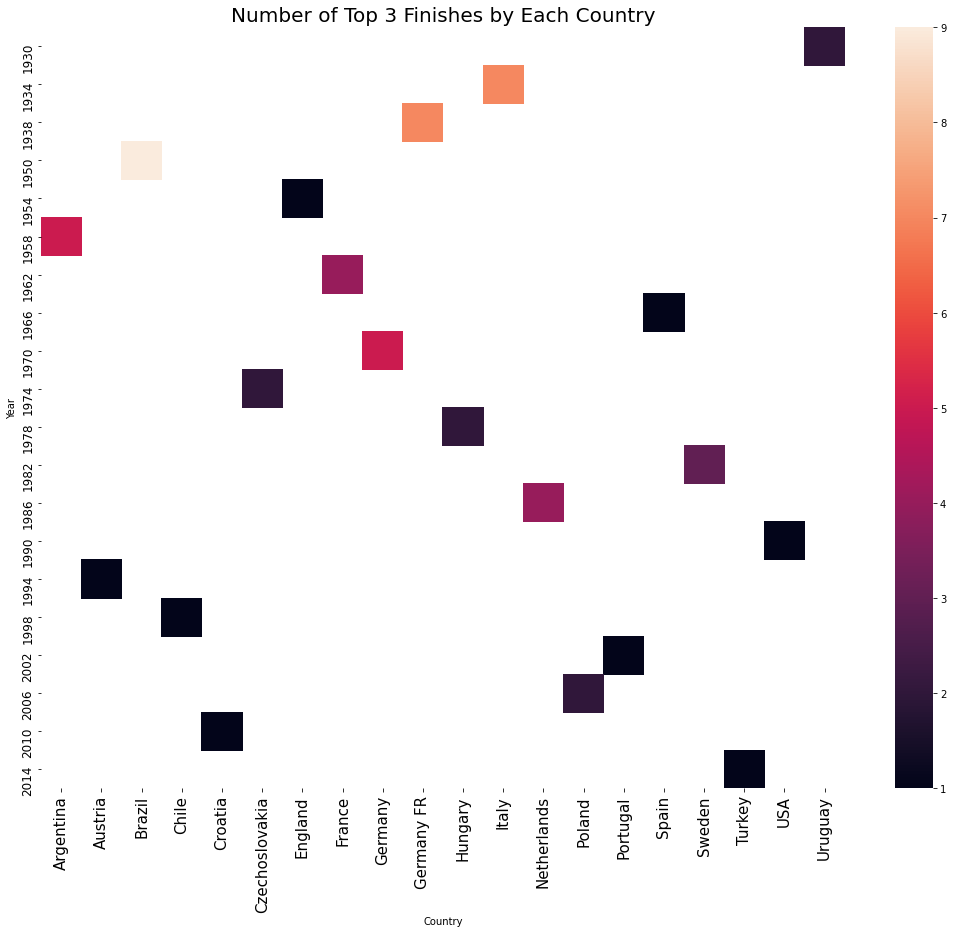

In [142]:
winner = cups_df["Winner"]
runnerUp = cups_df["Runners-Up"]
third = cups_df["Third"]

country_list = pd.concat([winner,runnerUp,third]).unique()
medals = {'Country':list(country_list),
           'Top3':[],
            'Year':cups_df["Year"]}
for j in country_list:
    finishes = 0
    for i in winner:
        if(i==j):
            finishes+=1
    for i in runnerUp:
        if(i==j):
            finishes+=1
    for i in third:
        if(i==j):
            finishes+=1
    medals['Top3'].append(finishes)           
top3_df = pd.DataFrame(medals)
#print(country_list)

fig = plt.figure(figsize=(20,15))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
textprops = {"fontsize":15}
country = top3_df["Country"]
top3 = top3_df["Top3"]
ax.pie(top3, labels = country,autopct='%1.2f%%',textprops =textprops)
plt.title("Number of Top 3 Finishes by Each Country",size = 20)
plt.legend()
plt.show()

#-----------------------------------------------------------------------------------------------------

top3_df = top3_df.pivot("Year", "Country", "Top3")
plt.figure(figsize = (18,14))
plt.title("Number of Top 3 Finishes by Each Country",size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
fig = sns.heatmap(top3_df)